<a href="https://colab.research.google.com/github/dylpicklesTU26/dylanmurray/blob/main/Murray_Patri_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dylan Murray and Maya Patri


Exploring Lyme Disease Trends  
[View this project on GitHub.io](https://github.com/dylpicklesTU26/dylanmurray)

**Project Overview – Exploring Lyme Disease Trends in the U.S.**

This project analyzes historical Lyme disease incidence across U.S. counties using publicly available CDC datasets, focusing on trends from 1992 to 2011. Lyme disease, a bacterial infection transmitted by ticks, is among the most prevalent vector-borne illnesses in North America. Its symptoms can range from mild fatigue and fever to severe long-term complications, making early detection and prevention critical.

In **Milestone 1**, we visualized trends in disease incidence by state and year range to identify high-risk regions and time periods with notable increases in reported cases.

In **Milestone 2**, we expanded our analysis by integrating county-level climate data. Specifically, we examined whether temperature patterns—particularly average annual temperatures—correlate with Lyme disease incidence. After merging the datasets by State, County, and YearRange, we used exploratory visualizations and linear regression to evaluate possible associations.

Our regression analysis revealed a statistically significant but modest negative correlation between temperature and reported Lyme cases. This suggests that colder regions may see more Lyme disease activity, possibly due to environmental conditions favoring tick habitats or host behaviors. While temperature alone is not a strong predictor, it may contribute to broader patterns when combined with ecological and behavioral variables in future models.


**Research Questions:**

How has Lyme disease incidence changed across U.S. counties from 1992–2011?

Which states and regions show the highest incidence rates or the steepest increases?

Does average temperature correlate with Lyme disease cases at the county level?

**Data Sourcing**

Lyme disease case data comes from the CDC – Lyme Disease Data and Surveillance (https://www.cdc.gov/lyme/data-research/facts-stats/index.html)

Temperature data comes from NOAA’s National Centers for Environmental Information (NCEI) (https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping/110/tavg/199603/60/value)

Our initial dataset for Lyme rates contained missing values (NaN) for Lyme incidence in some states, which required imputation before analysis and for temperature was aggregated and cleaned by year range for each county in the U.S.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load datasets
MERGED_df = pd.read_csv("/content/drive/MyDrive/DataScienceProject/MERGED.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**ADD IN CLEANING DATA SET**

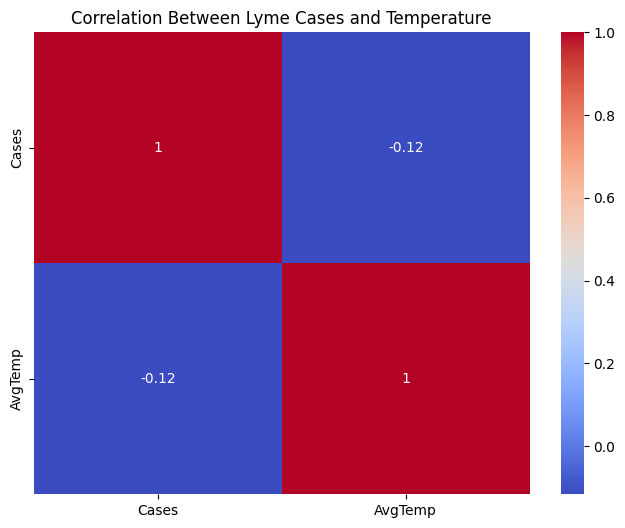

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(MERGED_df[['Cases', 'AvgTemp']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Lyme Cases and Temperature')
plt.show()

1.0 = perfect positive correlation

-1.0 = perfect negative correlation

0.0 = no correlation

**Lyme Cases vs. AvgTemp:** -0.12

This is a weak negative correlation, suggesting that as temperature increases, Lyme cases slightly decrease

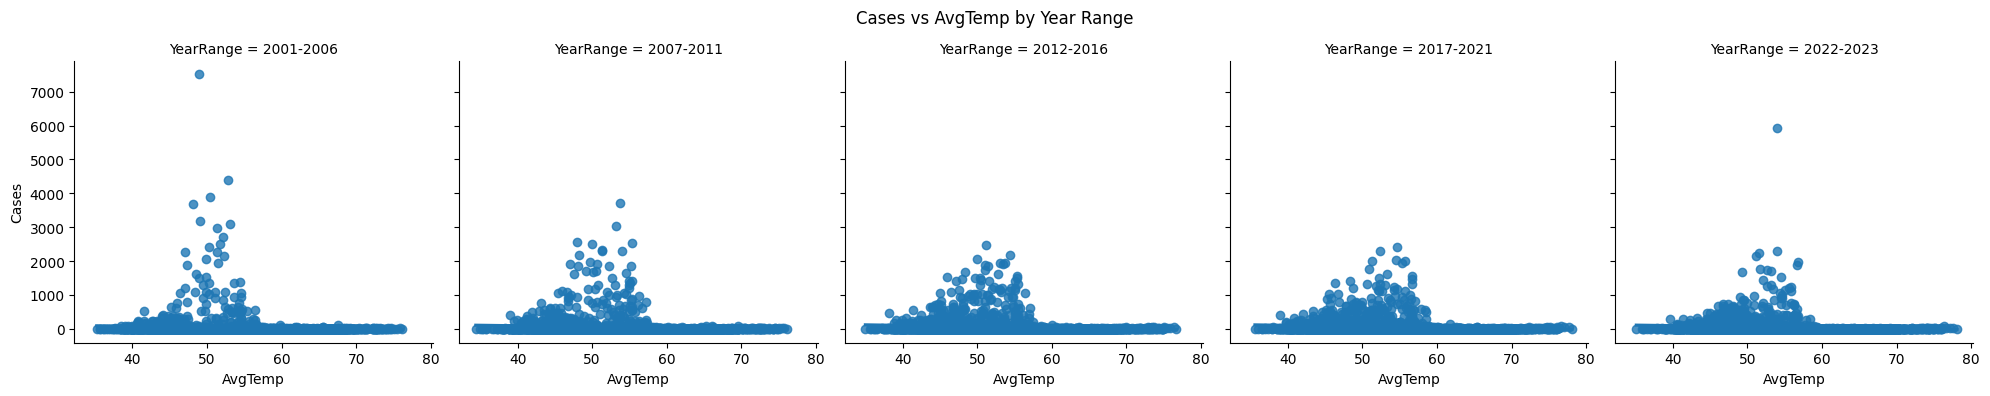

In [ ]:
# Scatter plots by year range
sns.lmplot(data=MERGED_df, x='AvgTemp', y='Cases', col='YearRange', height=4, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Cases vs AvgTemp by Year Range')
plt.show()


This figure displays five scatter plots, each showing the relationship between average temperature (AvgTemp) and Lyme disease cases (Cases) during a specific time range. Each dot represents a county-level average within that time range.

**X-axis** = average temperature in °F

**Y-axis** = number of Lyme disease cases

Most points are clustered at low case counts, regardless of temperature.

There are a few outliers (hotspot counties) with high case counts, typically in the **45–55°F range.**

There’s no clear upward or downward trend in most panels — visually confirming the weak overall correlation (r = -0.12). The range of AvgTemp narrows slightly in later years, possibly due to missing or excluded data.

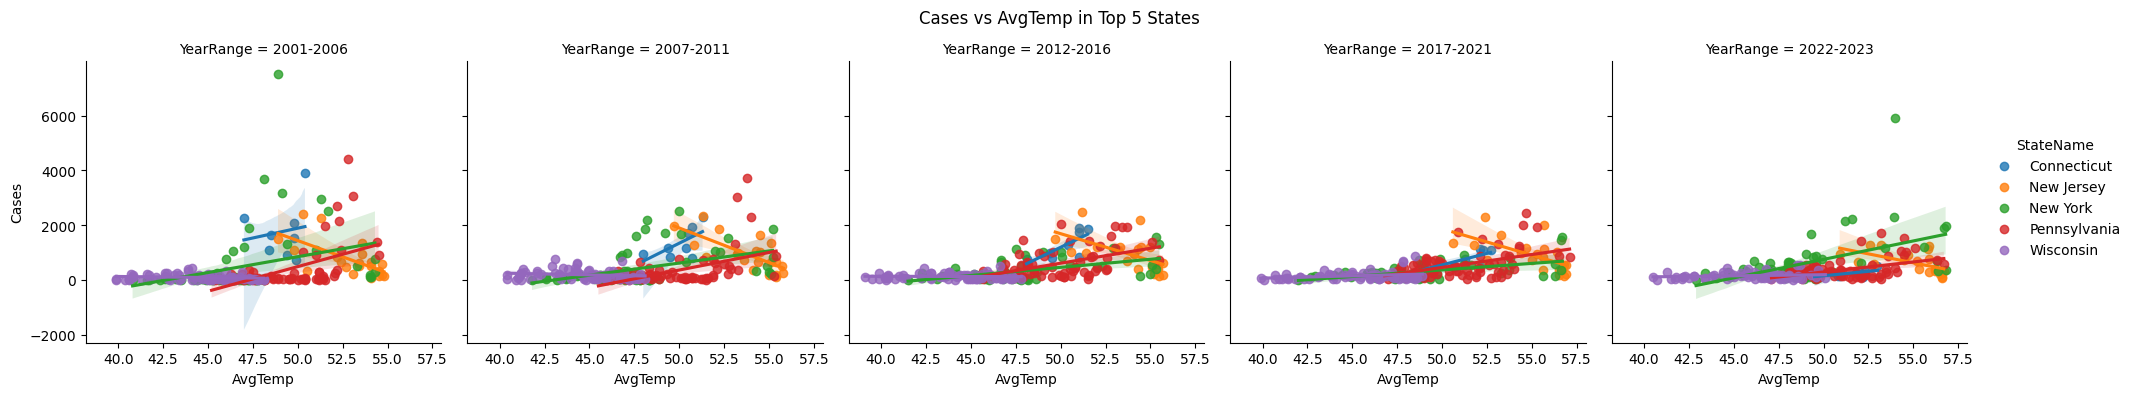

In [ ]:
# Top 5 states
top_states = MERGED_df.groupby('StateName')['Cases'].sum().nlargest(5).index.tolist()
top_merged = MERGED_df[MERGED_df['StateName'].isin(top_states)]
sns.lmplot(data=top_merged, x='AvgTemp', y='Cases', hue='StateName', col='YearRange', height=4, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Cases vs AvgTemp in Top 5 States')
plt.show()

Trend lines (regression fits) show whether higher temps are linked to more or fewer cases. Most states show a flat or slightly positive slope — i.e., warmer counties in these states tend to have slightly more Lyme cases. Some early periods (like 2001–2006) have more scatter and extreme outliers, likely due to *underreporting* or *emerging surveillance* in certain regions.

**New York** and **Pennsylvania** consistently show the highest case clusters, even at similar temperature ranges.

**Connecticut** has a moderate upward trend in earlier years but stabilizes later.

The temperature range narrows over time (especially for **Wisconsin**), suggesting climate consistency or selective reporting in later years.

Overall, the Top 5 Lyme-endemic states show weak to moderate positive trends between average temperature and Lyme case counts over time. While the warmer counties in some states correlate with more cases, the relationship is inconsistent and suggests regional ecological dynamics play a stronger role.



In [ ]:
# Linear regression
X = sm.add_constant(MERGED_df[['AvgTemp']])
y = MERGED_df['Cases']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     208.7
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           5.33e-47
Time:                        04:06:51   Log-Likelihood:            -1.0333e+05
No. Observations:               15235   AIC:                         2.067e+05
Df Residuals:                   15233   BIC:                         2.067e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        212.3526     11.732     18.101      0.0

Dependent Variable: Cases

Predictor: AvgTemp

R-squared = 0.014
Only 1.4% of the variation in Lyme cases is explained by temperature alone.

P-value (AvgTemp) < 0.001
The negative relationship is **statistically significant**, but statistical significance is **not equal** to **practical significance**. A very weak effect can still be **significant** in a **large dataset** (ours has 15,235 observations).

Linear regression shows a **weak but statistically significant negative relationship** between temperature and Lyme disease incidence (R² = 0.014, p < 0.001). However, temperature alone explains only ~1.4% of case variability, suggesting other ecological or geographic factors are far more influential.


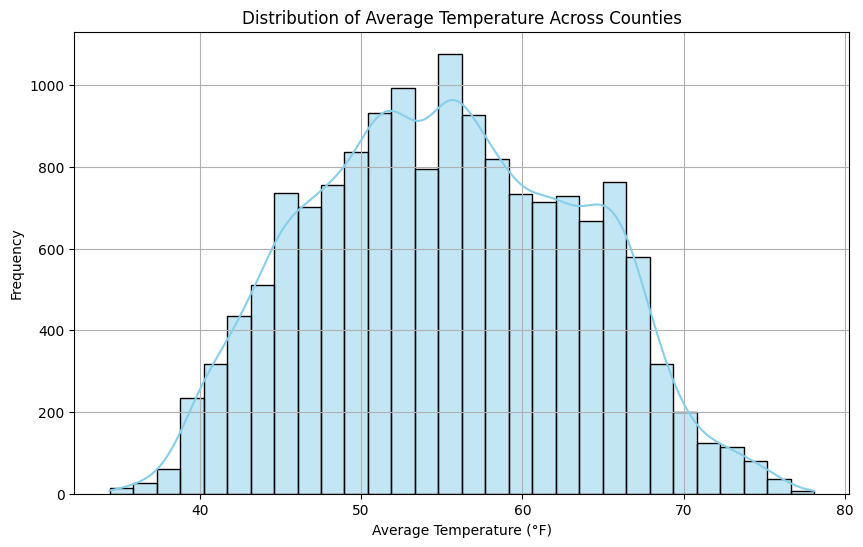

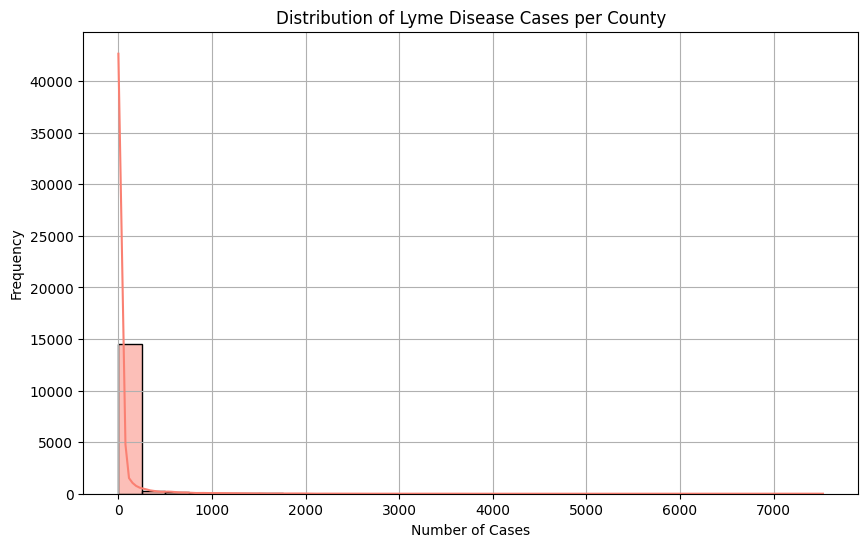

In [ ]:
# Histograms
plt.figure(figsize=(10,6))
sns.histplot(data=MERGED_df, x='AvgTemp', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Temperature Across Counties')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=MERGED_df, x='Cases', bins=30, kde=True, color='salmon')
plt.title('Distribution of Lyme Disease Cases per County')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The temperature distribution is roughly bell-shaped, peaking between **50–60°F** meaning that most counties fall within a temperate climate range.

There is an **extreme right-skew** in the second histogram, meaning the vast majority of counties have very few cases, while a small number have very high counts (1000+). This highlights that Lyme disease is highly concentrated in hotspot regions, not uniformly distributed.

Most counties have **moderate average temperatures between 50–60°F**, while Lyme disease case counts are **extremely skewed**, with most counties reporting few cases and **a small number accounting for the majority of the burden**. This suggests spatial clustering and highlights the need to examine region-specific dynamics.

<ipython-input-26-34e7d0e40e74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MERGED_df, x='TempQuartile', y='Cases', palette='YlGnBu')


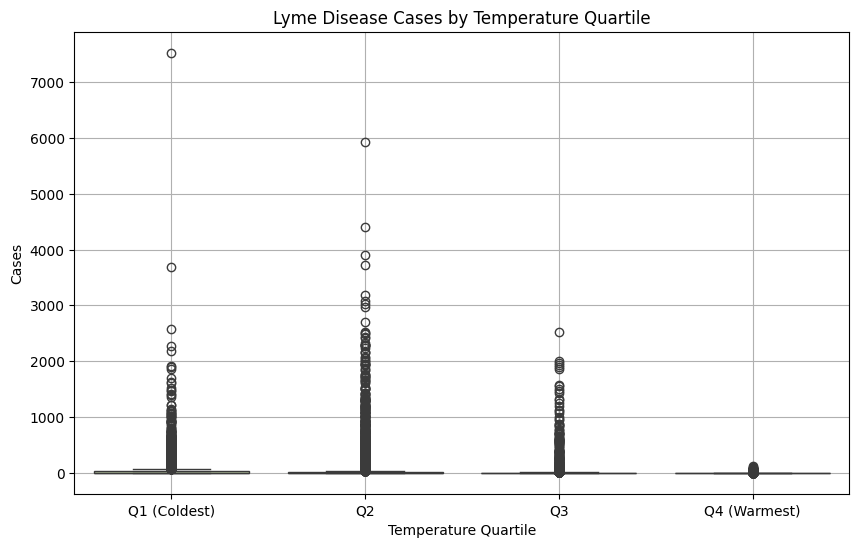

In [ ]:
# Boxplot by temperature quartile
MERGED_df['TempQuartile'] = pd.qcut(MERGED_df['AvgTemp'], q=4, labels=['Q1 (Coldest)', 'Q2', 'Q3', 'Q4 (Warmest)'])
plt.figure(figsize=(10,6))
sns.boxplot(data=MERGED_df, x='TempQuartile', y='Cases', palette='YlGnBu')
plt.title('Lyme Disease Cases by Temperature Quartile')
plt.xlabel('Temperature Quartile')
plt.ylabel('Cases')
plt.grid(True)
plt.show()

**Colder counties** (Q1 & Q2) tend to have higher median and max case counts

**Warmer counties** (Q4) show very low Lyme case counts overall, with almost no high outliers

This supports the earlier finding: Lyme disease is more prevalent in cooler, temperate regions

When grouped by temperature quartile, **colder counties consistently report higher Lyme case counts**. The warmest quartile (Q4) shows the lowest overall case burden, reinforcing the observed **inverse relationship** between temperature and disease prevalence.

In [ ]:
# State-wise regression loop
state_slopes = []

for state in MERGED_df['StateName'].unique():
    subset = MERGED_df[MERGED_df['StateName'] == state]
    if subset['AvgTemp'].nunique() > 1:  # avoid flat temperature distributions
        X = sm.add_constant(subset[['AvgTemp']])
        y = subset['Cases']
        model = sm.OLS(y, X).fit()
        state_slopes.append({
            'State': state,
            'Slope': model.params['AvgTemp'],
            'P-Value': model.pvalues['AvgTemp'],
            'R-squared': model.rsquared
        })

# Create DataFrame of regression results and sort by slope
state_slopes_df = pd.DataFrame(state_slopes).sort_values(by='Slope', ascending=False)

# Print top and bottom 5 states by slope
print("Top 5 States: Strongest Positive Relationships:\n", state_slopes_df.head(5))
print("\nTop 5 States: Strongest Negative Relationships:\n", state_slopes_df.tail(5))

Top 5 States: Strongest Positive Relationships:
             State       Slope       P-Value  R-squared
25  New Hampshire  130.170126  2.207808e-05   0.315333
34   Pennsylvania  108.541730  6.206277e-18   0.200618
16          Maine   87.771224  2.448189e-09   0.368066
28       New York   85.341619  1.207639e-11   0.138824
41        Vermont   55.077270  2.218080e-05   0.233944

Top 5 States: Strongest Negative Relationships:
           State       Slope       P-Value  R-squared
42     Virginia   -5.653620  6.048684e-03   0.015822
17     Maryland  -22.693592  7.783975e-02   0.031388
5   Connecticut -118.148888  1.792611e-01   0.046955
26   New Jersey -170.245805  2.426461e-10   0.323651
6      Delaware -328.825325  4.190554e-02   0.281432


For each U.S. state, we:

1. Ran a **linear regression** predicting Lyme disease cases from average temperature

2. Recorded the **slope, p-value, and R²** for each model

3. Ranked states by slope to find those with the **strongest positive and negative temperature–case relationships**

State-level regressions reveal sharp regional contrasts. Northeastern states (e.g., Maine, New Hampshire, Pennsylvania) show strong positive relationships between temperature and Lyme incidence, while coastal states like Delaware and New Jersey exhibit significant negative slopes. These findings suggest that the temperature–Lyme link is highly dependent on local ecological and environmental factors.

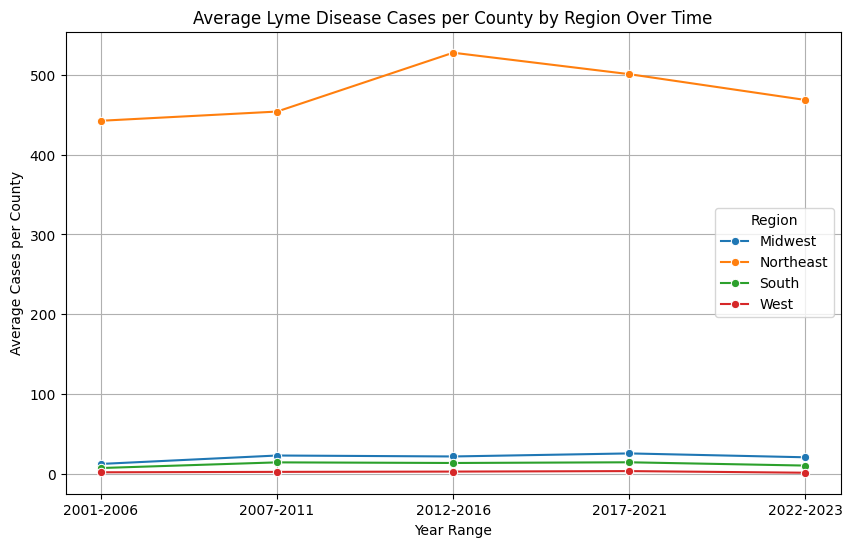

In [ ]:
# Direct map from full state names to regions
region_map_fullnames = {
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',

    'Ohio': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Illinois': 'Midwest', 'Wisconsin': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Nebraska': 'Midwest', 'Kansas': 'Midwest',

    'Delaware': 'South', 'Maryland': 'South', 'Virginia': 'South', 'West Virginia': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',

    'Montana': 'West', 'Idaho': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'New Mexico': 'West',
    'Arizona': 'West', 'Utah': 'West', 'Nevada': 'West', 'California': 'West', 'Washington': 'West',
    'Oregon': 'West', 'Alaska': 'West', 'Hawaii': 'West'
}

# Apply the map to your dataframe
MERGED_df['Region'] = MERGED_df['StateName'].map(region_map_fullnames)

# Drop rows with unknown regions (e.g., D.C. or territories not in the map)
regional_df = MERGED_df.dropna(subset=['Region'])

# Group by region and time
regional_trends = regional_df.groupby(['Region', 'YearRange'])['Cases'].mean().reset_index()

# Plot it
plt.figure(figsize=(10,6))
sns.lineplot(data=regional_trends, x='YearRange', y='Cases', hue='Region', marker='o')
plt.title('Average Lyme Disease Cases per County by Region Over Time')
plt.xlabel('Year Range')
plt.ylabel('Average Cases per County')
plt.grid(True)
plt.legend(title='Region')
plt.show()

This line plot tracks the average number of **Lyme disease cases per county over time** (in 5-year ranges), grouped by U.S. census regions:

**Northeast**

**Midwest**

**South**

**West**

Lyme disease is overwhelmingly concentrated in the Northeast, where cases per county have increased steadily over time. The Midwest also shows a rising trend, while the South and West remain low. These regional differences highlight the importance of geographic and ecological context in Lyme transmission.


In [ ]:
# LYME STATS
# National cases average
avg_national_cases = MERGED_df.groupby('YearRange')['Cases'].sum().mean()
print(f"Average Lyme disease cases nationwide (per 5-year period 1992–2011): {avg_national_cases:.2f}")

# National total for 2007–2011
cases_2007_2011 = MERGED_df[MERGED_df['YearRange'] == '2007-2011']['Cases'].sum()
print(f"Total Lyme disease cases nationwide for 2007–2011: {cases_2007_2011}")

# State with highest total cases
state_cases = MERGED_df.groupby('StateName')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False)
max_state_row = state_cases.iloc[0]
max_state_name = max_state_row['StateName']
max_state_cases = max_state_row['Cases']
print(f"State with highest total Lyme disease cases (1992–2011): {max_state_name} ({max_state_cases} cases)")

# WEATHER STATS

# National average temperature by year range
avg_temp_by_year = MERGED_df.groupby('YearRange')['AvgTemp'].mean().reset_index()
print("\nAverage temperature by year range:")
print(avg_temp_by_year)

# State with highest average temperature overall
state_temp_avg = MERGED_df.groupby('StateName')['AvgTemp'].mean().reset_index().sort_values(by='AvgTemp', ascending=False)
hottest_state = state_temp_avg.iloc[0]
print(f"\nState with highest average temperature: {hottest_state['StateName']} ({hottest_state['AvgTemp']:.2f}°F)")

# Correlation coefficient between temperature and Lyme cases
correlation = MERGED_df[['Cases', 'AvgTemp']].corr().iloc[0,1]
print(f"\nCorrelation between temperature and Lyme disease cases: {correlation:.3f}")

Average Lyme disease cases nationwide (per 5-year period 1992–2011): 136246.40
Total Lyme disease cases nationwide for 2007–2011: 136885.0
State with highest total Lyme disease cases (1992–2011): Pennsylvania (147886.0 cases)

Average temperature by year range:
   YearRange    AvgTemp
0  2001-2006  54.701575
1  2007-2011  54.740597
2  2012-2016  54.886249
3  2017-2021  55.995471
4  2022-2023  56.008270

State with highest average temperature: Florida (71.20°F)

Correlation between temperature and Lyme disease cases: -0.116


From 2001–2023, Lyme disease cases averaged ~136,000 per 5-year period, peaking in states like **Pennsylvania**. National temperatures rose steadily over the same time, with Florida averaging the highest temperatures. A **weak negative correlation** (r = –0.116) suggests that Lyme disease is more common in cooler temperate regions, though temperature alone is a poor predictor.

We used Ordinary Least Squares (OLS) linear regression to model the relationship between average temperature (a continuous independent variable) and Lyme disease case counts (a continuous dependent variable).

We choose linear regression because simple, interpretable, and gives us:

1. The direction (positive or negative) of the relationship

2. The magnitude of change (e.g., “3 more cases per °F”)

3. Statistical significance (p-values) and fit (R²)

It's a good first model to test whether temperature alone can explain variance in case counts.

But, as we saw, the relationship is weak and noisy — suggesting a more complex model may better capture the dynamics.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html "/content/drive/My Drive/DataScienceProject/Murray_Patri_M1.ipynb"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/DataScienceProject/Murray_Patri_M1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 600487 bytes to /content/drive/My Drive/DataScienceProject/Murray_Patri_M1.html
